## Problem Statement


This assignment is a programming assignment wherein you have to categorize countries using  some socio-economic and health factors that determine the overall development of the country using Clustering(K-means and Hierarchial clustering).

#### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

#### Objectives
Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT.  The following approach is suggested :

 

- Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.
- <b>Outlier Analysis:</b> You must perform the Outlier Analysis on the dataset. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.
- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]
- Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - <b>[gdpp, child_mort and income]</b> vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.
- Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure you create visualisations for all the three pairs. You can also choose other types of plots like boxplots, etc. 
- Both K-means and Hierarchical may give different results because of previous analysis (whether you chose to keep or remove the outliers, how many clusters you chose,  etc.) Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 
pd.options.mode.chained_assignment = None

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading & Understanding Data 

In [2]:
countries_df=pd.read_csv(r"Country-data.csv")

In [3]:
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
countries_data_dict_df=pd.read_csv(r"data-dictionary+.csv")

In [5]:
countries_data_dict_df.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


## Data Preparation

In [6]:
countries_df.shape

(167, 10)

In [7]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
#Checking for null values
countries_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<b>Note:</b> Clearly there are no missing values

## Data Cleaning

In [10]:
#Since the columns(exports,imports and health) are in percentages we convert them to absolute values
countries_df['exports'] =countries_df['exports'] * countries_df['gdpp']/100
countries_df['imports'] = countries_df['imports'] * countries_df['gdpp']/100
countries_df['health'] = countries_df['health'] * countries_df['gdpp']/100

In [11]:
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Data Visualization

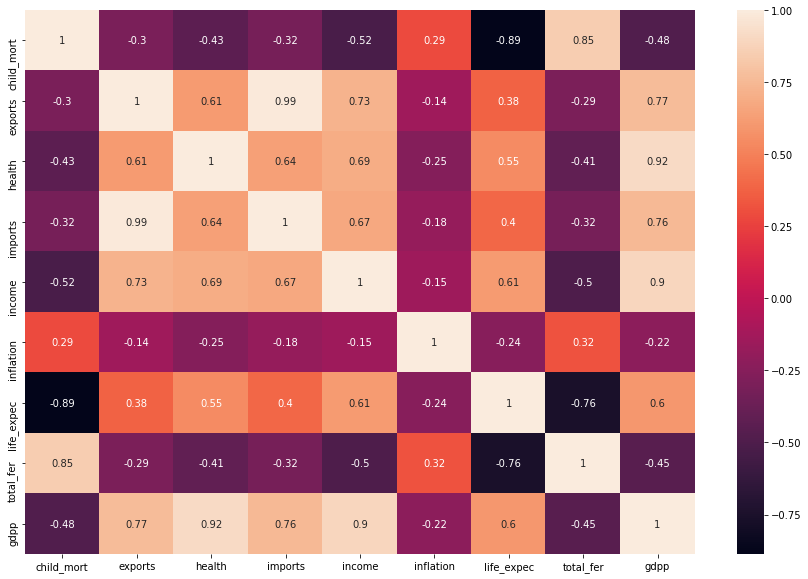

In [12]:
#Lets find the correlation of virables with each other
plt.figure(figsize = (15,10))        
sns.heatmap(countries_df.corr(),annot = True)

plt.show()

<b>Observations:</b>
- imports & exports, income & gdpp and health & gdpp are highly correlated with each other respectively
- child_mort & total_fer has a good correlation value of 0.85
- child_mort & life_expec has a higher negative correlation value of -0.89
- total_fer is in strong negative correlation with life_expec with a value of -0.76

## Variable Analysis

<AxesSubplot:title={'center':'income Vs child_fert'}, xlabel='income', ylabel='child_mort'>

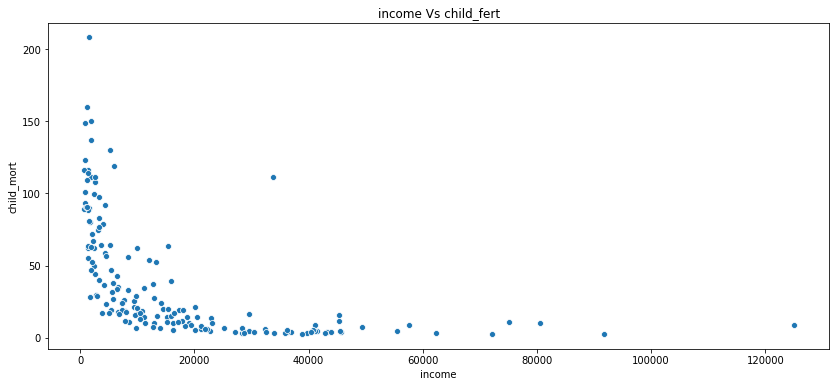

In [13]:
#lets plot a scatterplot between income and child_mort
plt.figure(figsize=(14, 6))
plt.title('income Vs child_fert')
sns.scatterplot(x='income',y='child_mort',data=countries_df)

- From the plot above we can see that people with low income have high child mortality, which inturn means death of children under age 5 is high, when there is a decrease in income.
- As we go along X-axis the income increases decreasing in the number of child mortality. With high income the child mortality rate is quiet very low.

<AxesSubplot:title={'center':'child_fert Vs total_fer'}, xlabel='total_fer', ylabel='child_mort'>

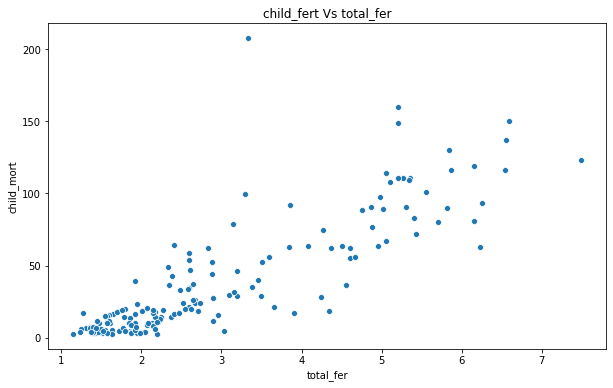

In [14]:
#lets plot a scatterplot between total_fer and child_mort
plt.figure(figsize=(10, 6))
plt.title('child_fert Vs total_fer')
sns.scatterplot(x='total_fer',y='child_mort',data=countries_df)

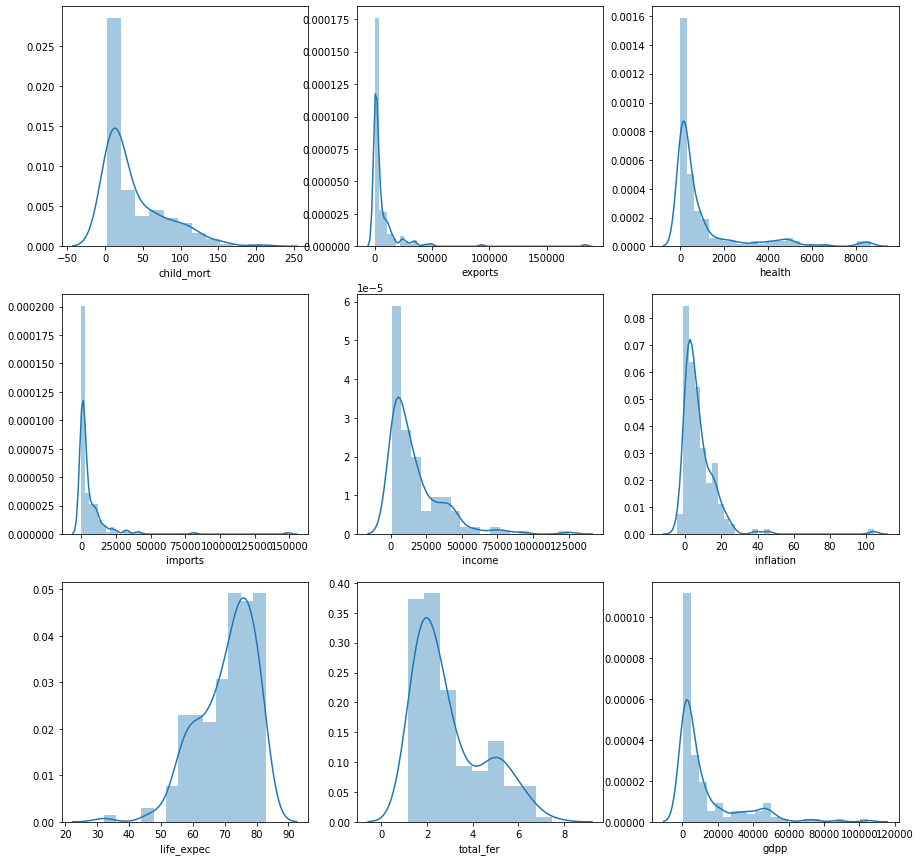

In [15]:
plt.figure(figsize=(15,15))
feature=countries_df.iloc[:,1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(countries_df[i[1]])

## Checking for outliers

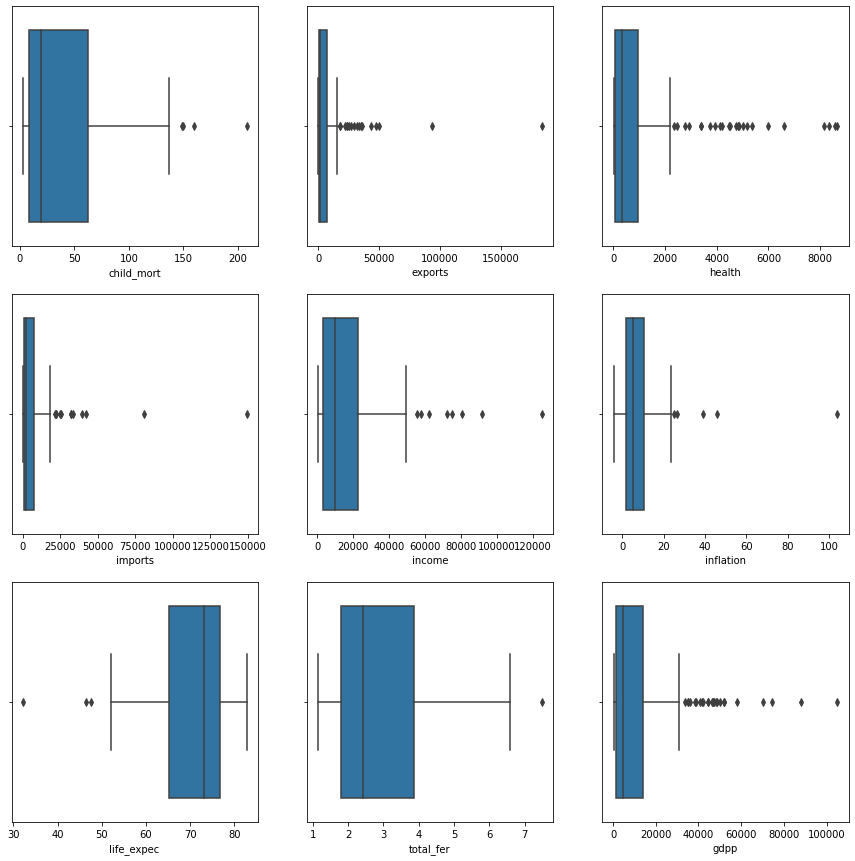

In [16]:
plt.figure(figsize=(15,15))
feature=countries_df.iloc[:,1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(countries_df[i[1]])

### Treating outliers by capping

In [17]:
#capping of exports
qa2=countries_df['exports'].quantile(0.99)
countries_df['exports'][countries_df['exports'] >= qa2]=qa2

#capping for imports
qb2=countries_df['imports'].quantile(0.99)
countries_df['imports'][countries_df['imports'] >= qb2]=qb2

#capping for health
qc2=countries_df['health'].quantile(0.99)
countries_df['health'][countries_df['health'] >= qc2]=qc2

#capping for income
qd2=countries_df['income'].quantile(0.99)
countries_df['income'][countries_df['income'] >= qd2]=qd2

#capping for health
#qe2=countries_df['health'].quantile(0.99)
#countries_df['health'][countries_df['health'] >= qa2]=qe2

#capping for life_expec
qf2=countries_df['life_expec'].quantile(0.99)
countries_df['life_expec'][countries_df['life_expec'] >= qf2]=qf2

#capping for life_expec
qg2=countries_df['life_expec'].quantile(0.99)
countries_df['life_expec'][countries_df['life_expec'] >= qg2]=qg2

#capping for total_fer
qh2=countries_df['total_fer'].quantile(0.99)
countries_df['total_fer'][countries_df['total_fer'] >= qh2]=qh2

#capping for gdpp
qi2=countries_df['gdpp'].quantile(0.99)
countries_df['gdpp'][countries_df['gdpp'] >= qi2]=qi2


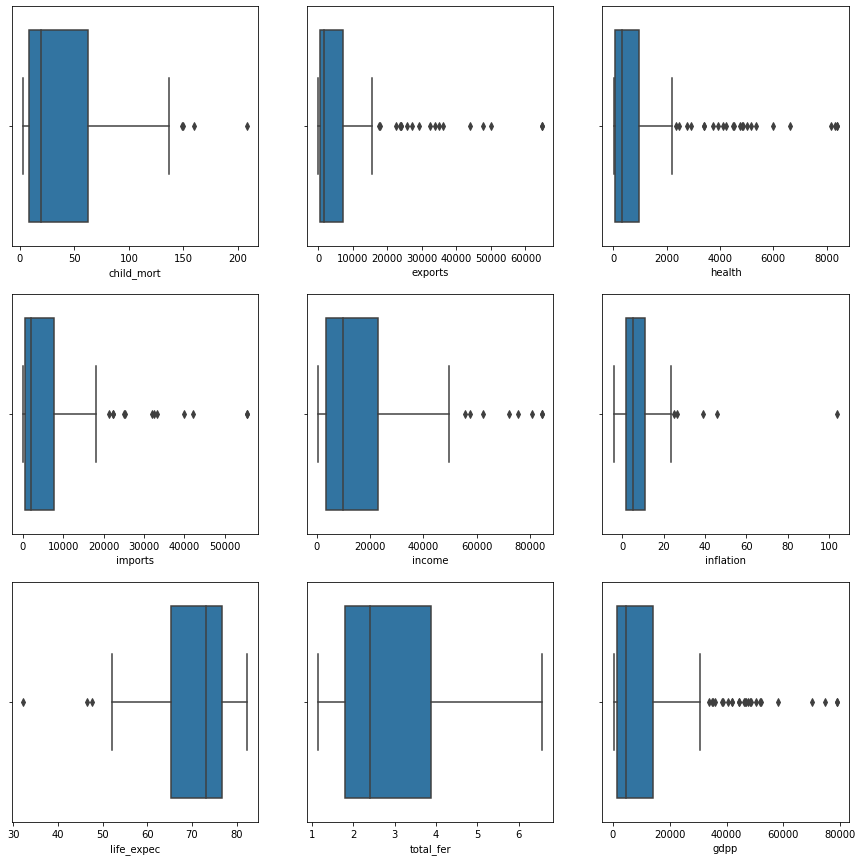

In [18]:
plt.figure(figsize=(15,15))
feature=countries_df.iloc[:,1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(countries_df[i[1]])

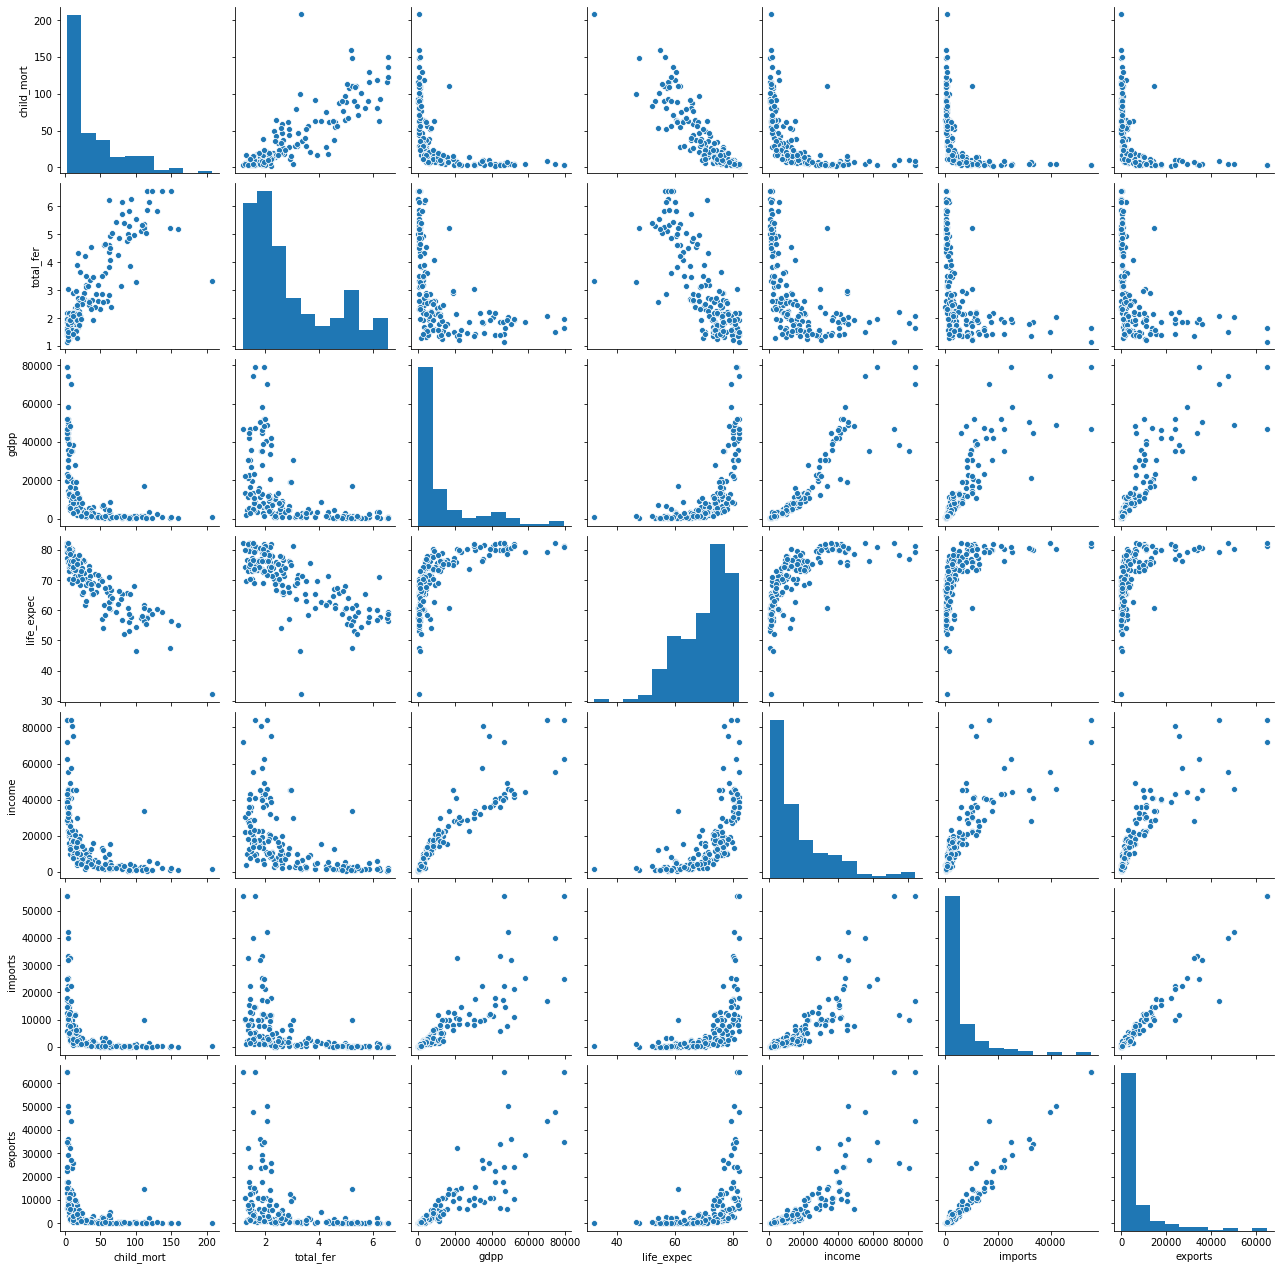

In [19]:
#we will plot a pairplot to see the correlation between different variables
sns.pairplot(countries_df, vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports'], kind='scatter')
plt.show()

## Hopkins Score check

In [20]:
#check for hopkins score using an external library
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [21]:
for i in range(0,10,1):
    print(hopkins(countries_df.drop('country',axis=1)))

0.9469764455396493
0.9133197014012666
0.8600399134628898
0.9424647688652632
0.9182395039638948
0.8076056356569895
0.9053214633259201
0.9304796431978342
0.9148950752159265
0.9204770540191314


- So it clearly has a good tendency for clustering as all 10 samples have score of >80%

## Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
countries_df1 = scaler.fit_transform(countries_df.drop('country', axis = 1))
countries_df1

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61987975,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64911331,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67169035,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28788058,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34427669,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09399771,
         1.64524315, -0.6500669 ]])

In [23]:
countries_df1 = pd.DataFrame(countries_df1, columns = countries_df.columns[1:])
countries_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619880,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.649113,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671690,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179627,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705556,-0.543736,-0.032042


## K-mean Clustring

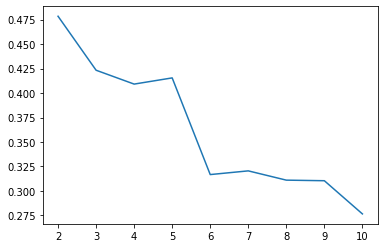

In [24]:
# There are two methods to choose the value of k: 1. Silhouette score 2. Elbow curve-ssd
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(countries_df1)
    ss.append([k, silhouette_score(countries_df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

- From the plot of silhouette score above, We can see that we have the maximum at 2, and next maximum is at 3. So we can go with 3.

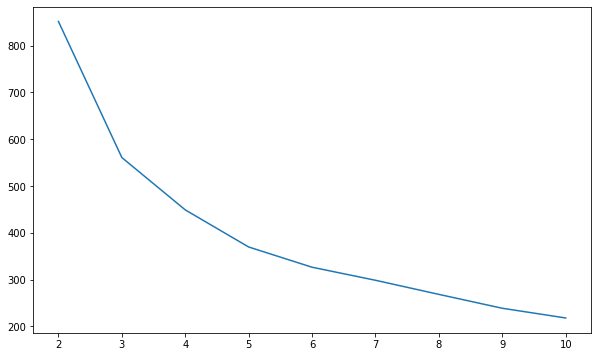

In [25]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(countries_df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.figure(figsize=(10,6))
plt.plot(temp[0], temp[1])
plt.show()

- From the above elbow curve we can see that we have a breakpoint at 3, 4, 5 and 6. 
- Since the silhouette score curve showed a max point at 3 so here in elbow curve we go with the same lower value of K that is 3

In [26]:
# Now we choose value of K=3
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(countries_df1)

KMeans(n_clusters=3, random_state=50)

In [27]:
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [28]:
countries_df_kmean = countries_df.copy()

In [29]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [30]:
countries_df_kmean = pd.concat([countries_df_kmean, label], axis =1)
countries_df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [31]:
countries_df_kmean.label.value_counts()

0    92
2    48
1    27
Name: label, dtype: int64

- Cluster 0 has higher number of data points

## Plotting the cluster

### child_mort vs income

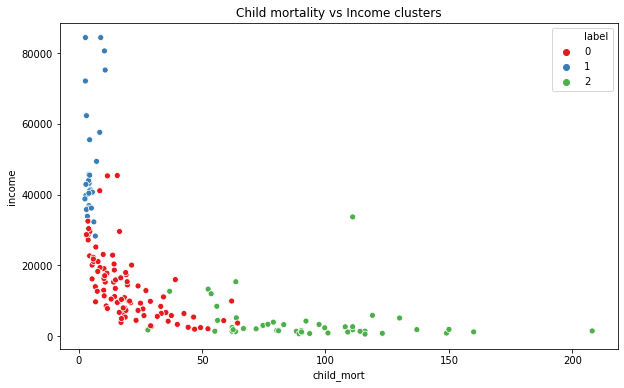

In [32]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'income', hue='label', data = countries_df_kmean, palette = 'Set1')
plt.title('Child mortality vs Income clusters')
plt.show()

### child_mort vs gdp

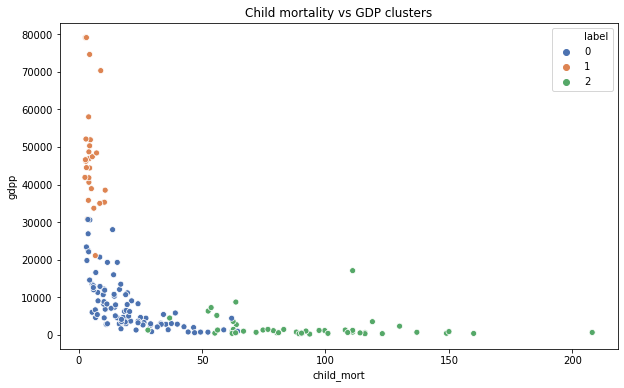

In [33]:
# Plot the cluster|
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = countries_df_kmean, palette = 'deep')
plt.title('Child mortality vs GDP clusters')
plt.show()

### income vs gdpp

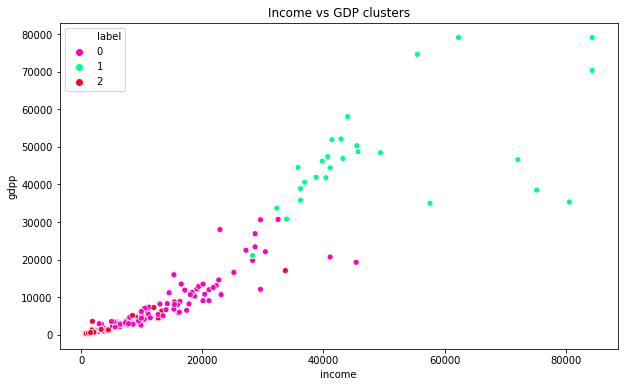

In [34]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = countries_df_kmean, palette = 'gist_rainbow_r')
plt.title('Income vs GDP clusters')
plt.show()

## Cluster Profiling

In [35]:
#making sense out of the cluster by finding the mean of each cluster
countries_df2=countries_df_kmean.drop('country', axis = 1).groupby('label').mean()
countries_df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565
1,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.426504,1.775185,47476.888889
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.972233,1909.208333


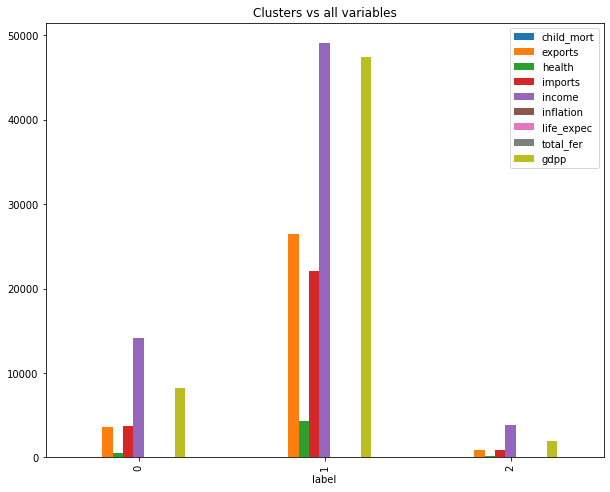

In [36]:
countries_df_kmean.drop('country', axis = 1).groupby('label').mean().plot.bar(figsize=(10,8))
plt.title("Clusters vs all variables")
plt.show()

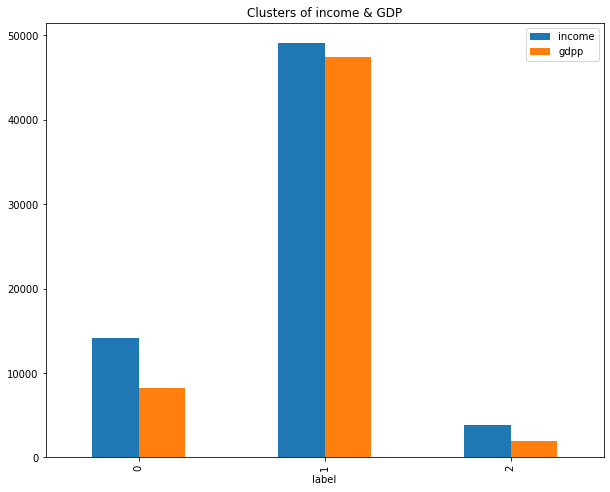

In [37]:
countries_df_kmean.drop(['country', 'exports', 'health', 'imports','child_mort','inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(10,8))
plt.title('Clusters of income & GDP')
plt.show()

- Cluster 1 has high income and high gdpp among all 3 clusters
- cluster 2 has low income and low gdp among all 3 clusters

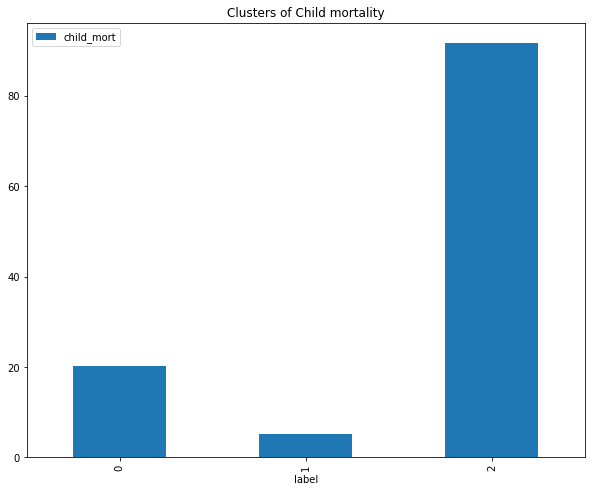

In [38]:
countries_df_kmean.drop(['country', 'exports', 'health', 'imports','income', 'gdpp','inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(10,8))
plt.title('Clusters of Child mortality')
plt.show()

- Cluster 2 has highest child mortality while Cluster 1 has the lowest among all 3

<b>Note: </b> Form the above cluster profiling results we cann see that:
- Cluster 2 has low income and low gdp but high child mortality
- Cluster 1 has high income and high gdp but low child mortality  

<b>Note:</b> Since cluster 2 has low income and low gdp but high child mortality. It's quiet clear that countries under cluster 2 are in need of aid

In [39]:
Kmean=countries_df_kmean[countries_df_kmean['label'] == 2]
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


### The following are the countries that need to be focused:

In [40]:
Kmean.country.reset_index(drop=True)

0                  Afghanistan
1                       Angola
2                        Benin
3                     Botswana
4                 Burkina Faso
5                      Burundi
6                     Cameroon
7     Central African Republic
8                         Chad
9                      Comoros
10            Congo, Dem. Rep.
11                 Congo, Rep.
12               Cote d'Ivoire
13           Equatorial Guinea
14                     Eritrea
15                       Gabon
16                      Gambia
17                       Ghana
18                      Guinea
19               Guinea-Bissau
20                       Haiti
21                        Iraq
22                       Kenya
23                    Kiribati
24                         Lao
25                     Lesotho
26                     Liberia
27                  Madagascar
28                      Malawi
29                        Mali
30                  Mauritania
31                  Mozambique
32      

In [41]:
#Sorting based on high child mortality,low income and GDP
countries_final=countries_df_kmean[countries_df_kmean['label'] == 2].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
countries_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,2


### The top10 countries that are in dire need of aid are:

In [42]:
countries_final.country.reset_index(drop=True).head(10)

0                       Haiti
1                Sierra Leone
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

## Heirarchical clustering

#### There are two types of hierarchical clustering:

- Single linkage
- Complete linkage

In [43]:
countries_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619880,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.649113,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.671690,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179627,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.705556,-0.543736,-0.032042


## Single linkage

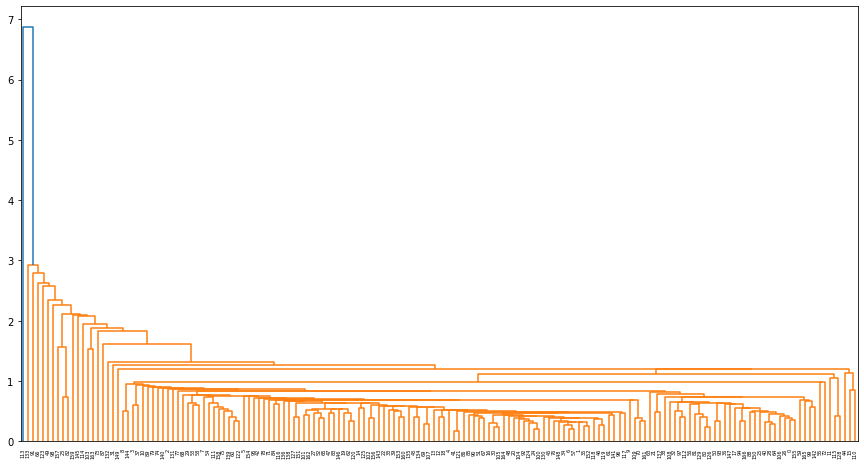

In [44]:
plt.figure(figsize = (15,8))
mergings = linkage(countries_df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### The above dendogram produced by single linkage isn't clear enough to understand

## Complete linkage

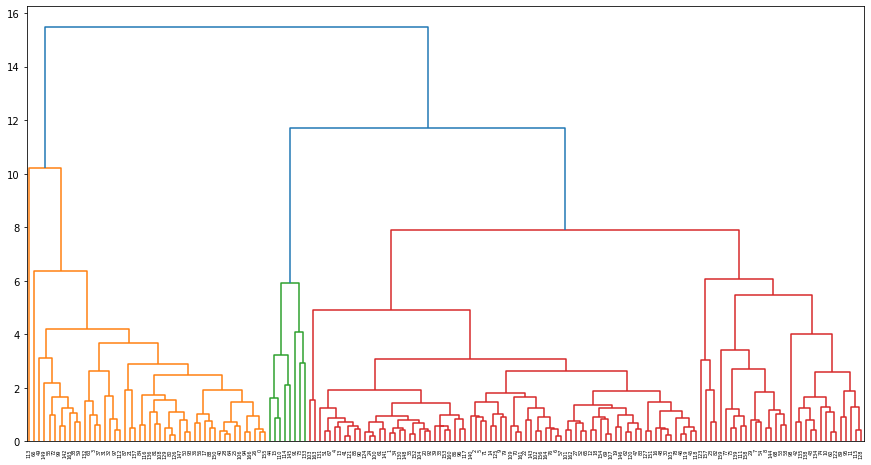

In [45]:
plt.figure(figsize = (15,8))
mergings = linkage(countries_df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### The dendogram produced by the complete linkage is clear to understand and analyze the clusters.

Lets take a threshold value of 10. Draw the horizontal line for the same height

In [46]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [47]:
#assigning the cluster labels
countries_df['cluster_labels'] = cluster_labels
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [48]:
countries_df.cluster_labels.value_counts()

1    111
0     48
2      8
Name: cluster_labels, dtype: int64

<b>Note:</b> 3 clusters are formed out of which cluster 1 has the highest data points while cluster 2 has the lowest data points

<b>Note:</b> It is quiet clear that the clusters formed aren't that great as cluster 2 has just 8 data points

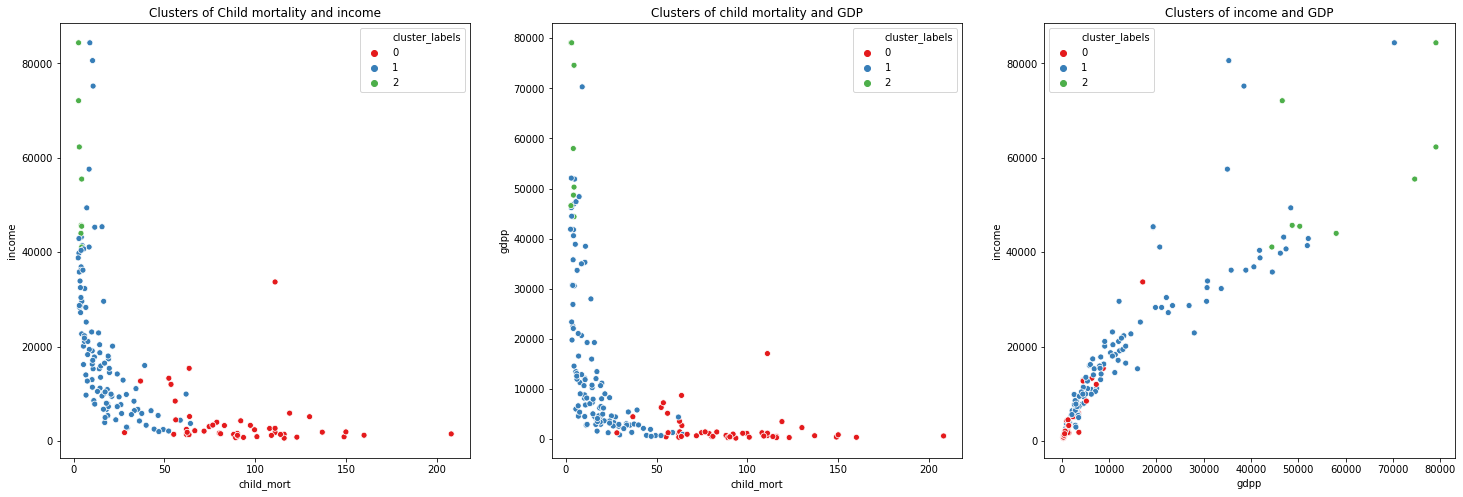

In [71]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=countries_df, palette='Set1')
plt.title('Clusters of Child mortality and income')

plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels',data=countries_df, palette='Set1')
plt.title('Clusters of child mortality and GDP')

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',data=countries_df,palette='Set1')
plt.title('Clusters of income and GDP')
plt.show()

## Plots of each cluster with each of the variable(child_mort, income, gdpp)

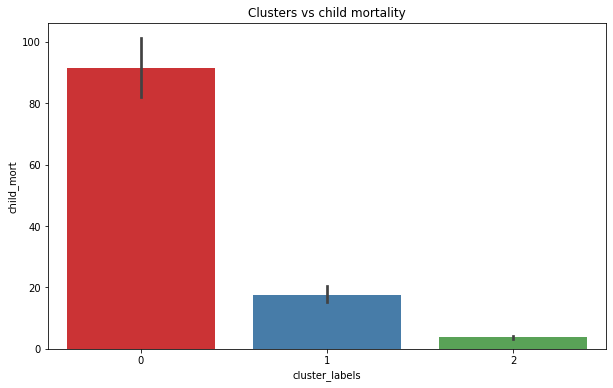

In [50]:
#plot of clusters w.r.t to child_mort
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='child_mort', data=countries_df,palette='Set1')
plt.title('Clusters vs child mortality')
plt.show()

- Cluster 2 has lowest child mortality
- Cluster 0 has highest child mortality

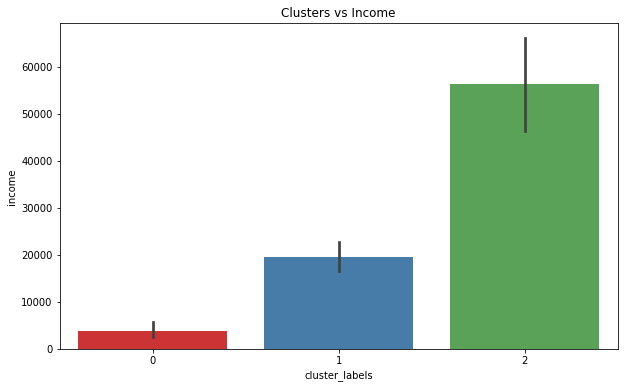

In [51]:
#plot of clusters w.r.t to income
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='income', data=countries_df,palette='Set1')
plt.title('Clusters vs Income')
plt.show()

- Cluster 2 has highest income
- Cluster 0 has lowest income

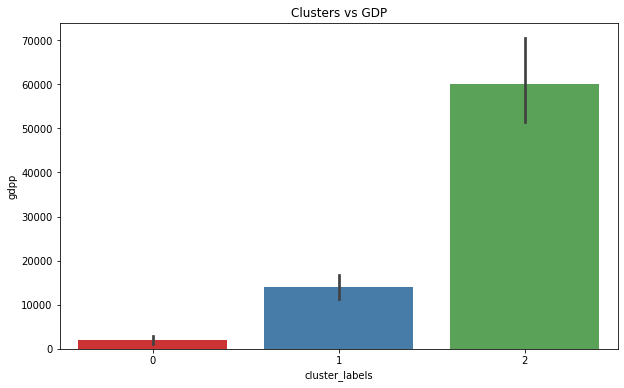

In [52]:
#plot of clusters w.r.t to gdp
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='gdpp', data=countries_df,palette='Set1')
plt.title('Clusters vs GDP')
plt.show()

- Cluster 2 has highest gdpp
- Cluster 0 has lowest gdpp

<b>Note: </b> Form the above cluster profiling results we cann see that:
- Cluster 0 has low income and low gdp but high child mortality
- Cluster 2 has high income and high gdp but low child mortality  

<b>Note:</b> Since cluster 0 has low income and low gdp but high child mortality. It's quiet clear that countries under cluster 0 are in need of aid

In [53]:
countries_df[countries_df['cluster_labels'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [54]:
countries_df3=countries_df[countries_df['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False,True, True])
countries_df3.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,104.00,60.5,5.8400,2330.0,0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.40,60.1,6.1600,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.81,57.9,5.8700,575.0,0


### Top10 countries that are in dire need of aid are:

In [55]:
countries_df_final_hier=countries_df3[['country']]
countries_df_hier= countries_df_final_hier.reset_index(drop=True)
countries_df_hier.head(10)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


Since we got better clusters in k-mean clustering. Hence, we go with cluster 2 of k-mean clustering that had low income, low gdp and high child mortality.

### Final list of top10 countries with low income, low gdp and high child mortality in k-mean clustering are:

In [56]:
countries_final.country.reset_index(drop=True).head(10)

0                       Haiti
1                Sierra Leone
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

#### Now since we are supposed to choose countries based on socio-economic and health factors;

In [57]:
countries_final.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.972233,1909.208333,2.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,0.995640,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,2.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,2.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,6.563600,17100.000000,2.0


#### We can see that for the selected cluster (Cluster 2) the mean for child mortality is 91.6. Lets extract out countries that have child mortality higher than the mean(91.6)

In [58]:
countries_df_final = countries_final[countries_final['child_mort']>91.6]
countries_df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
97,Mali,137.0,161.4240,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,2
113,Nigeria,130.0,589.4900,118.1310,405.420,5150.0,104.000,60.5,5.8400,2330.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2


In [59]:
countries_df_final.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,121.704762,1010.792248,83.584857,850.461429,3639.190476,14.191667,56.547619,5.386533,1708.190476,2.0
std,27.164489,3164.988809,159.534694,2143.001506,7039.657972,21.894914,7.401798,0.966908,3607.677295,0.0
min,92.100000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,101.286000,26.796000,170.868000,1190.000000,4.150000,55.600000,5.110000,446.000000,2.0
50%,114.000000,161.424000,40.634100,279.936000,1820.000000,6.810000,57.700000,5.340000,708.000000,2.0
75%,130.000000,460.980000,64.660000,428.314000,2690.000000,17.200000,60.100000,6.160000,1200.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,68.200000,6.563600,17100.000000,2.0


#### Now we can see that the mean value of income for the same cluster is 3639.19. Lets extract out countries having income lesser than the mean income of the entire cluster

In [60]:
countries_df_final = countries_df_final[countries_df_final['income']<3639.19]
countries_df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
97,Mali,137.0,161.4240,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.970,55.6,5.0500,547.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,2


In [61]:
countries_df_final.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,123.747059,213.279835,43.975647,333.308235,1611.352941,7.989706,55.335294,5.415129,698.352941,2.0
std,29.176320,187.106274,26.677977,274.763937,781.538942,6.497282,7.693174,0.983881,345.567638,0.0
min,93.600000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,81.503000,26.796000,170.200000,918.000000,2.970000,55.000000,5.110000,419.000000,2.0
50%,114.000000,137.274000,38.755000,248.508000,1430.000000,5.450000,57.300000,5.340000,648.000000,2.0
75%,137.000000,290.820000,52.269000,390.195000,1930.000000,12.300000,58.000000,6.260000,897.000000,2.0
max,208.000000,617.320000,129.870000,1181.700000,3320.000000,20.800000,68.200000,6.563600,1310.000000,2.0


#### Now we can see that the mean value of income for the same cluster is 698.35. Lets extract out countries having income lesser than the mean gdp of the entire cluster

In [62]:
countries_df_final = countries_df_final[countries_df_final['gdpp']<698.35]
countries_df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.81,57.9,5.8700,575.0,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.0500,547.0,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.3400,648.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2


### Final List of countries which are in need of dire aid based on socio-economic factors are:

In [63]:
countries_df_final.country.reset_index(drop=True).head(10)

0                       Haiti
1                Sierra Leone
2    Central African Republic
3                       Niger
4            Congo, Dem. Rep.
5                Burkina Faso
6               Guinea-Bissau
7                      Guinea
8                  Mozambique
9                     Burundi
Name: country, dtype: object